In [95]:
import gzip
import numpy as np

f = gzip.open('./train-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(28 * 28 * 60000)
X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_train = X_train.reshape(60000, 28 * 28)
print(X_train.shape)
f2 = gzip.open('./train-labels-idx1-ubyte.gz','r')
f2.read(8)
buf2 = f2.read()
Y_train = np.frombuffer(buf2, dtype = np.uint8).astype(np.int64)
# Y_train[0:200]
print(len(Y_train))
f3 = gzip.open('./t10k-images-idx3-ubyte.gz','r')
f3.read(16)
buf3 = f3.read(28*28*10000)
X_test = np.frombuffer(buf3,dtype = np.uint8).astype(np.float32)
X_test = X_test.reshape(10000,28*28)
print(X_test.shape)
f4 = gzip.open('./t10k-labels-idx1-ubyte.gz','r')
f4.read(8)
buf4 = f4.read()
Y_test = np.frombuffer(buf4, dtype = np.uint8).astype(np.int64)
print(len(Y_test))

(60000, 784)
60000
(10000, 784)
10000


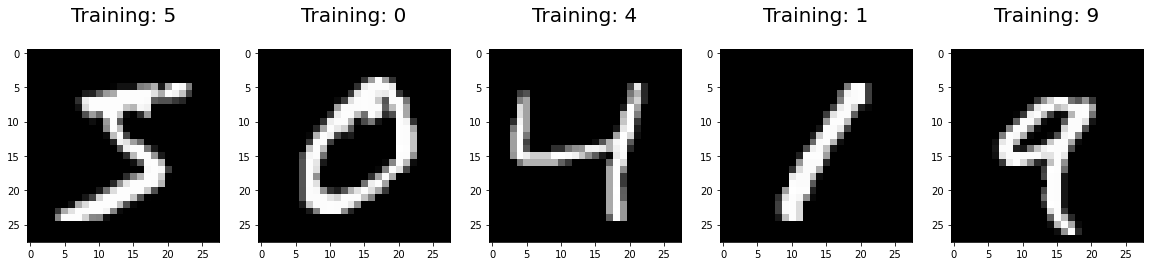

In [96]:
#visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], Y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [97]:
# building Naive Bayes & Logistic Regression
from sklearn.naive_bayes import MultinomialNB, ComplementNB

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


NBmodel = MultinomialNB(alpha = 0.001,fit_prior = True)
NBmodel.fit(X_train,Y_train)
NBpred = NBmodel.predict(X_test)
# print(NBmodel.classes_)
nbcm = confusion_matrix(Y_test,NBpred)
print(nbcm)
for i in range(len(nbcm)):
    acc = nbcm[i,i]/np.sum(nbcm[i])
    print("The accuracy of number %d is %0.5f" % (i,acc))
# print(nbcm)

[[ 912    0    2    6    1    8   14    1   36    0]
 [   0 1061    5    9    0    2    6    0   51    1]
 [  15   11  860   23   10    3   32   11   66    1]
 [   4   11   34  851    1   21    7   14   40   27]
 [   2    2    6    0  732    0   25    2   38  175]
 [  23   11    6  107   18  591   17    6   77   36]
 [  16   13   17    1    6   25  862    0   18    0]
 [   1   21   11    5   18    0    1  861   40   70]
 [   6   26   13   54   14   27    8    9  777   40]
 [   6    7    3   10   66   10    0   17   27  863]]
The accuracy of number 0 is 0.93061
The accuracy of number 1 is 0.93480
The accuracy of number 2 is 0.83333
The accuracy of number 3 is 0.84257
The accuracy of number 4 is 0.74542
The accuracy of number 5 is 0.66256
The accuracy of number 6 is 0.89979
The accuracy of number 7 is 0.83755
The accuracy of number 8 is 0.79774
The accuracy of number 9 is 0.85530


In [98]:
#prediction accuracy of NB model
print('AUC: %0.5f' % accuracy_score(Y_test, NBpred))

AUC: 0.83700


In [99]:
nbtrain_pred = NBmodel.predict(X_train)
nbcmtrain = confusion_matrix(Y_train,nbtrain_pred)
nbcmtrain

array([[5360,    4,   31,   16,   10,   85,  101,    0,  311,    5],
       [   0, 6304,   46,   41,    6,   28,   33,    3,  264,   17],
       [  79,   81, 4945,  127,   65,    8,  266,   47,  325,   15],
       [  35,  116,  294, 4957,   12,  123,   58,   48,  289,  199],
       [  19,   19,   37,    5, 4340,   17,  118,   14,  233, 1040],
       [ 157,   45,   47,  648,  107, 3607,  128,   12,  471,  199],
       [  58,  113,   86,    3,   28,  135, 5414,    0,   80,    1],
       [  39,  104,   42,   26,  149,    2,    7, 5162,  195,  539],
       [  35,  333,   95,  313,   73,  209,   48,   14, 4501,  230],
       [  42,   51,   24,   76,  389,   21,    3,  169,  232, 4942]])

In [100]:
print('AUC: %0.5f' % accuracy_score(Y_train, nbtrain_pred))

AUC: 0.82553


In [101]:
#Logistic regression model
logitReg = LogisticRegression(C=1/60000, penalty="l2", solver="saga", tol=0.1)
logitReg.fit(X_train,Y_train)
LRpred = logitReg.predict(X_test)


In [102]:
#examine the confusion matrix and accuracy
lrcm = confusion_matrix(Y_test,LRpred)
print(lrcm)
for i in range(len(lrcm)):
    acc = lrcm[i,i]/np.sum(lrcm[i])
    print("The accuracy of number %d is %0.5f" % (i,acc))

[[ 961    0    0    3    0    3    6    2    5    0]
 [   0 1114    3    2    0    1    4    2    9    0]
 [   4    9  923   15    8    5   12    9   41    6]
 [   3    0   18  913    0   32    3   10   22    9]
 [   1    1    4    2  917    0   11    3    9   34]
 [   9    2    2   28   12  769   17    8   38    7]
 [   9    3    5    1    9   15  911    3    2    0]
 [   1    5   24    6    8    1    0  953    5   25]
 [   5    9    4   23    9   28    9   13  867    7]
 [   9    8    2    8   27    6    0   25    9  915]]
The accuracy of number 0 is 0.98061
The accuracy of number 1 is 0.98150
The accuracy of number 2 is 0.89438
The accuracy of number 3 is 0.90396
The accuracy of number 4 is 0.93381
The accuracy of number 5 is 0.86211
The accuracy of number 6 is 0.95094
The accuracy of number 7 is 0.92704
The accuracy of number 8 is 0.89014
The accuracy of number 9 is 0.90684


In [103]:
print('AUC: %0.5f' % accuracy_score(Y_test, LRpred))

AUC: 0.92430


In [104]:
#exam the prediction performance on the training dataset
lrtrain_pred = logitReg.predict(X_train)
lrcmtrain = confusion_matrix(Y_train,lrtrain_pred)
lrcmtrain

array([[5744,    1,   20,    7,   12,   44,   35,   11,   47,    2],
       [   1, 6567,   34,   20,    7,   21,    3,   12,   65,   12],
       [  31,   50, 5380,   85,   70,   27,   66,   79,  143,   27],
       [  18,   19,  132, 5514,    6,  196,   21,   56,  113,   56],
       [  12,   28,   26,    8, 5484,    6,   54,   17,   34,  173],
       [  70,   27,   44,  162,   57, 4739,   94,   19,  152,   57],
       [  34,   14,   35,    0,   41,   61, 5698,    3,   30,    2],
       [  18,   25,   63,   25,   44,    6,    3, 5891,   18,  172],
       [  29,   99,   55,  118,   28,  148,   40,   20, 5245,   69],
       [  23,   27,   17,   72,  152,   33,    2,  174,   48, 5401]])

In [105]:
print('AUC: %0.5f' % accuracy_score(Y_train, lrtrain_pred))

AUC: 0.92772


In [82]:
#saving the model
import joblib
joblib.dump(NBmodel,'./nb.model.pkl')
joblib.dump(logitReg,'./lr.model.pkl')

['./lr.model.pkl']